<a href="https://colab.research.google.com/github/IlyaZutler/Project-3-Berlin-Airbnb-Ratings/blob/main/%D0%9A%D0%B0%D1%80%D1%82%D0%B0%20%D0%B8%20%D1%82%D0%BE%D1%87%D0%BA%D0%B83-1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**This dataset contains information on Airbnb listings in Berlin, including reviewer ratings and comments**

review_date: The date of the review. (Date)


Reviewer Name: The name of the reviewer. (String)


Comments: The reviewer's comments. (String)


Listing URL: The URL of the listing. (String)


Listing Name: The name of the listing. (String)


Host URL: The URL of the host. (String)


Host Name: The name of the host. (String)


Host Since: The date the host joined Airbnb. (Date)


Host Response Time: The host's response time. (String)


Host Response Rate: The host's response rate. (String)


Is Superhost: Whether or not the host is a Superhost. (Boolean)


neighbourhood: The neighbourhood of the listing. (String)


Neighborhood Group: The neighbourhood group of the listing. (String)


City: The city of the listing. (String)


Postal Code: The postal code of the listing. (String)


Country Code: The country code of the listing. (String)


Country Code: The country code of the listing. (String)


Latitude: The latitude of the listing. (Float)


Longitude: The longitude of the listing. (Float)


Is Exact Location: Whether or not the location is exact. (Boolean)


Property Type: The type of property. (String)


Room Type: The type of room. (String)


Accomodates: The number of people the property can accommodate. (Integer)


Bathrooms: The number of bathrooms. (Float)


Bedrooms: The number of bedrooms. (Integer)


Beds: The number of beds. (Integer)


Square Feet: The square footage of the property. (Float)


Price: The price of the listing. (Float)


Guests Included: The number of guests included in the price. (Integer)


Min Nights: The minimum number of nights required to stay. (Integer)


Reviews: The number of reviews the listing has. (Integer)


First Review: The date of the first review. (Date)


Last Review: The date of the last review. (Date)


Overall Rating: The listing's overall rating. (Float)


Accuracy Rating: The listing's accuracy rating. (Float)


Cleanliness Rating: The listing's cleanliness rating. (Float)


Checkin Rating: The listing's checkin rating. (Float)


Communication Rating: The listing's communication rating. (Float)


Location Rating: The listing's location rating. (Float)


Value Rating: The listing's value rating. (Float)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

!pip install openpyxl -q
import openpyxl

pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_colwidth', 1000)

In [4]:
apartments = pd.read_excel('/content/apartments.xlsx', engine='openpyxl')

In [ ]:
# # not usefull
# !pip install autoviz -q
# from autoviz.AutoViz_Class import AutoViz_Class
# %matplotlib inline
#
# apartments_numeric = apartments_need[['Accomodates',
#        'Bathrooms', 'Bedrooms', 'Beds', 'Square Feet', 'Price',
#        'Guests Included', 'Min Nights', 'Reviews', 'First Review',
#        'Last Review', 'Overall Rating', 'Accuracy Rating',
#        'Cleanliness Rating', 'Checkin Rating', 'Communication Rating',
#        'Location Rating', 'Value Rating']]
# AV = AutoViz_Class()
# AV.AutoViz('', dfte=apartments_numeric)


In [ ]:
apartments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23550 entries, 0 to 23549
Data columns (total 41 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Listing ID             23550 non-null  int64  
 1   Listing URL            23550 non-null  object 
 2   Listing Name           23496 non-null  object 
 3   Host ID                23550 non-null  int64  
 4   Host URL               23550 non-null  object 
 5   Host Name              23529 non-null  object 
 6   Host Since             23529 non-null  object 
 7   Host Response Time     13059 non-null  object 
 8   Host Response Rate     13059 non-null  float64
 9   Is Superhost           23529 non-null  object 
 10  neighbourhood          23550 non-null  object 
 11  Neighborhood Group     23550 non-null  object 
 12  City                   23547 non-null  object 
 13  Postal Code            22964 non-null  object 
 14  Country Code           23550 non-null  object 
 15  Co

In [5]:
#apartments['Price'] = apartments['Price'].str.replace('$', '').str.replace(',', '').astype(float)
apartments['Host Since'] = pd.to_datetime(apartments['Host Since'])
apartments['First Review'] = pd.to_datetime(apartments['First Review'])
apartments['Last Review'] = pd.to_datetime(apartments['Last Review'])

<ipython-input-5-320653a0dbd8>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  apartments['Host Since'] = pd.to_datetime(apartments['Host Since'])
<ipython-input-5-320653a0dbd8>:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  apartments['First Review'] = pd.to_datetime(apartments['First Review'])
<ipython-input-5-320653a0dbd8>:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  apartments['Last Review'] = pd.to_datetime(apartments['Last Review'])


In [ ]:
apartments.isnull().sum()

Listing ID                     0
Listing URL                    0
Listing Name                  54
Host ID                        0
Host URL                       0
Host Name                     21
Host Since                    21
Host Response Time         10491
Host Response Rate         10491
Is Superhost                  21
neighbourhood                  0
Neighborhood Group             0
City                           3
Postal Code                  586
Country Code                   0
Country                        0
Latitude                       0
Longitude                      0
Is Exact Location              0
Property Type                  0
Room Type                      0
Accomodates                    0
Bathrooms                     29
Bedrooms                      20
Beds                          35
Square Feet                23123
Price                          0
Guests Included                0
Min Nights                     0
Reviews                        0
First Revi

In [ ]:
apartments.columns

Index(['Listing ID', 'Listing URL', 'Listing Name', 'Host ID', 'Host URL',
       'Host Name', 'Host Since', 'Host Response Time', 'Host Response Rate',
       'Is Superhost', 'neighbourhood', 'Neighborhood Group', 'City',
       'Postal Code', 'Country Code', 'Country', 'Latitude', 'Longitude',
       'Is Exact Location', 'Property Type', 'Room Type', 'Accomodates',
       'Bathrooms', 'Bedrooms', 'Beds', 'Square Feet', 'Price',
       'Guests Included', 'Min Nights', 'Reviews', 'First Review',
       'Last Review', 'Overall Rating', 'Accuracy Rating',
       'Cleanliness Rating', 'Checkin Rating', 'Communication Rating',
       'Location Rating', 'Value Rating', 'Instant Bookable',
       'Business Travel Ready'],
      dtype='object')

In [ ]:
(apartments.groupby('Property Type')
        .agg(Count=('Listing ID', 'count'), Mean_Price=('Price', 'mean'))
        .sort_values('Count', ascending=False)
        .style.format({'Mean_Price': '{:.2f}'}))

,Count,Mean_Price
Property Type,,
Apartment,20948,59.87
Condominium,577,72.62
Loft,458,121.28
House,436,71.38
Serviced apartment,316,195.57
Hostel,183,133.90
Townhouse,108,78.71
Bed and breakfast,85,64.61
Guest suite,73,56.89


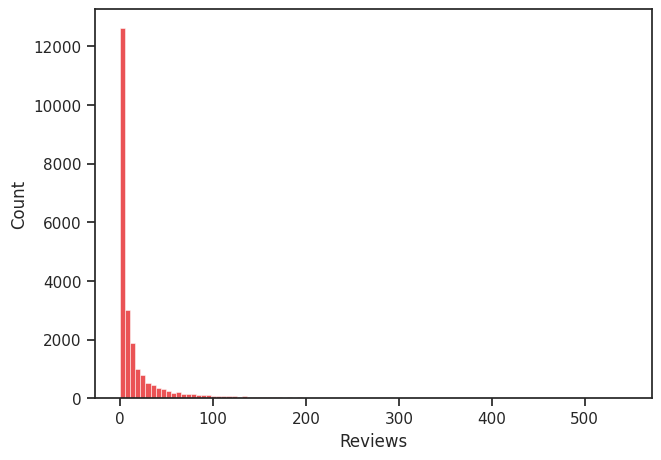

In [ ]:
sns.histplot(apartments['Reviews'], bins=100)
plt.show()

In [6]:
apartments['Reviews Log'] = np.log1p(apartments['Reviews'])

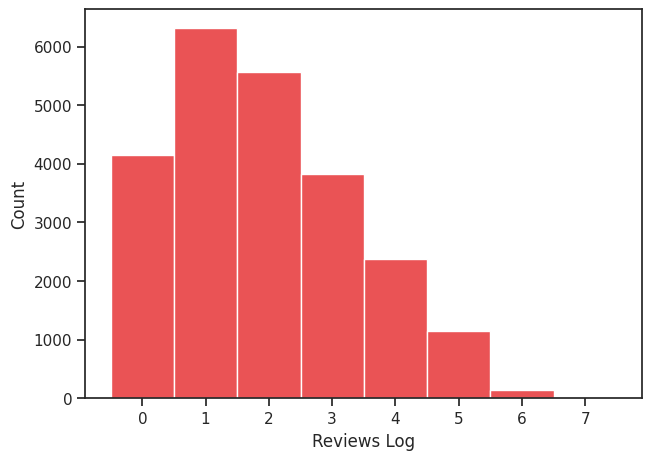

In [ ]:
sns.histplot(apartments['Reviews Log'], discrete=(True))
plt.show()

In [7]:
apartments_need = apartments.drop(['Listing ID', 'Listing URL', 'Listing Name', 'Host ID', 'Host URL',
       'Host Name', 'Host Response Time', 'Host Response Rate',
       'neighbourhood', 'Neighborhood Group', 'City',
       'Postal Code', 'Country Code', 'Country','Square Feet'], axis=1)

apartments_need = apartments_need[apartments_need['Property Type'].isin(['Apartment', 'Condominium'])]
apartments_need = apartments_need[(apartments_need['Price'] > 10) & (apartments_need['Price'] < 1000)]

In [8]:
apartments_need.shape

(21472, 27)

In [ ]:
apartments['Location Rating'].value_counts()

Location Rating
10.0    12334
9.0      5187
8.0      1061
6.0       144
7.0       119
4.0        22
5.0         9
2.0         9
Name: count, dtype: int64

In [9]:
apartments['Location Rating Roughly'] = apartments['Location Rating'].apply(lambda x: 8 if x < 9 else x)

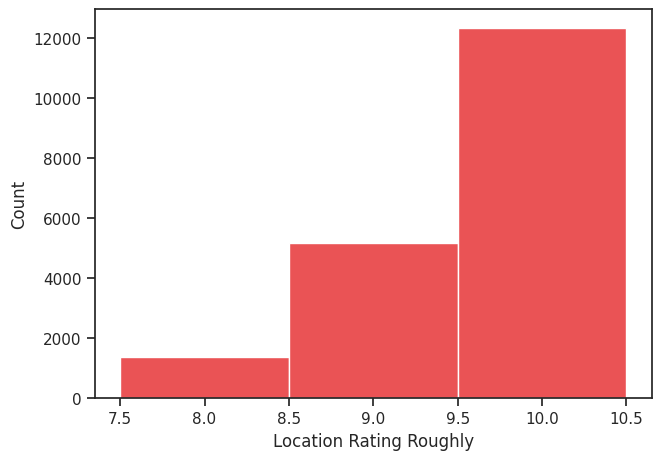

In [ ]:
sns.histplot(apartments['Location Rating Roughly'], discrete=(True))
plt.show()

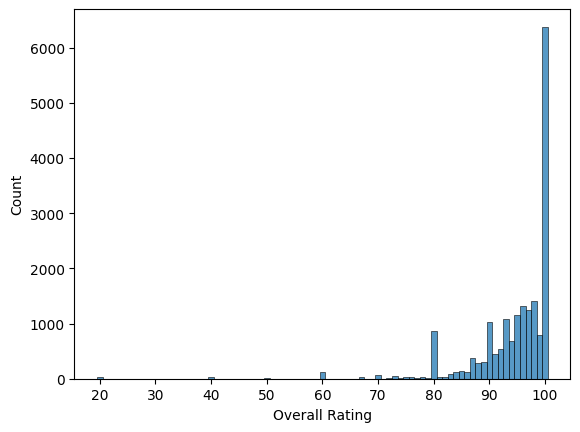

In [ ]:
sns.histplot(apartments['Overall Rating'], discrete=(True))
plt.show()

In [10]:
!pip install -q folium matplotlib

import folium
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap, Normalize, to_hex

In [ ]:
df = apartments[['Latitude', 'Longitude','Location Rating Roughly','Reviews Log']]
df.dropna(inplace=True)

# Цвета для Location Rating
color_map = {
    8: 'blue',
    9: 'green',
    10: 'red'
}

# Создание карты с использованием folium
m = folium.Map(location=[df['Latitude'].mean(), df['Longitude'].mean()], zoom_start=5)

# Добавление точек на карту
for idx, row in df.iterrows():
    color = color_map.get(row['Location Rating Roughly'], 'gray')  # Использование серого цвета по умолчанию
    folium.CircleMarker(
        location=(row['Latitude'], row['Longitude']),
        radius=row['Reviews Log'] + 1,
        color=color,
        fill=True,
        fill_color=color
    ).add_to(m)

# Создание пользовательской цветовой легенды
legend_html = '''
<div style="
    position: fixed;
    bottom: 50px; left: 50px; width: 150px; height: 120px;
    background-color: white; z-index:9999; font-size:14px;
    border:2px solid grey; border-radius:5px;
    ">
    <div style="padding: 10px;">
        <b>Location Rating</b><br>
        <i style="background:blue; width:18px; height:18px; float:left; margin-right:5px; border-radius:50%;"></i>8<br>
        <i style="background:green; width:18px; height:18px; float:left; margin-right:5px; border-radius:50%;"></i>9<br>
        <i style="background:red; width:18px; height:18px; float:left; margin-right:5px; border-radius:50%;"></i>10<br>
    </div>
</div>
'''

# Добавление легенды на карту
m.get_root().html.add_child(folium.Element(legend_html))

# Сохранение карты в файл
m.save('map.html')

# Отображение карты (если используется Jupyter Notebook или Colab)
m

In [11]:
!pip install geopy -q
from geopy.distance import geodesic

In [ ]:
# Координаты точек (Latitude и Longitude)
coords_1 = (52.345800, 13.097180)  # Берлин
coords_2 = (52.345800, 13.757640)   # Париж

# Вычисление расстояния в километрах
distance_meters = geodesic(coords_1, coords_2).kilometers * 1000

# Форматирование числа с разделением разрядов пробелами
distance_str = "{:,.0f}".format(distance_meters).replace(",", " ")

print(f"Расстояние между точками: {distance_str} метров")


Расстояние между точками: 45 009 метров


по высоте 34 км, по ширине 45 км.
разделить интервал по ширине от 13.097180 до 13.757640 на 45/2 кусков
и разделить от 52.345800 до 52.651670 на 34/2 интервалов.

In [12]:
# Разделение интервалов для Latitude и Longitude
lat_intervals = np.linspace(apartments['Latitude'].min(), apartments['Latitude'].max(), 91)  # 90 отрезков означает 91 точка
lon_intervals = np.linspace(apartments['Longitude'].min(), apartments['Longitude'].max(), 69)  # 70 отрезков означает 71 точка

# Создание столбцов Latitude_No и Longitude_No
apartments['Latitude_Bin'] = pd.cut(apartments['Latitude'], bins=lat_intervals, labels=False, include_lowest=True)
apartments['Longitude_Bin'] = pd.cut(apartments['Longitude'], bins=lon_intervals, labels=False, include_lowest=True)

# функция для определения бина
def determine_bins(lat, lon, lat_intervals, lon_intervals):
    lat_bin = np.digitize(lat, lat_intervals) - 1  # Индексы в numpy начинаются с 0
    lon_bin = np.digitize(lon, lon_intervals) - 1
    return lat_bin, lon_bin


In [13]:
lat = 52.489182
lon = 13.416555
determine_bins(lat, lon, lat_intervals, lon_intervals)

(42, 32)

In [14]:
!pip install pandas numpy libpysal geopy esda -q
import numpy as np
import pandas as pd
from geopy.distance import great_circle

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 24.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.4/135.4 kB 9.0 MB/s eta 0:00:00


In [15]:
import numpy as np
import pandas as pd
from geopy.distance import great_circle
import libpysal
from esda.moran import Moran

df = apartments[['Latitude', 'Longitude', 'Latitude_Bin', 'Longitude_Bin','Location Rating Roughly','Reviews Log']].sample(1000)
df.dropna(inplace=True)
df = df.reset_index(drop=True)

# Функция для расчета Moran's I
def calculate_morans_i(df, primary_threshold_m=500):
    epsilon = 0.01  # Маленькое значение для предотвращения деления на ноль
    primary_threshold_km = primary_threshold_m / 1000

    # Рассчитываем взвешенное среднее значение переменной
    y = df['Location Rating Roughly'].values
    weights = df['Reviews Log'].values
    mean_y = np.average(y, weights=weights)
    n = len(df)

    # Сумма весов
    S0 = 0
    # Числитель Moran's I
    numerator = 0
    # Знаменатель Moran's I
    denominator = 0

    for i in range(n):
        lat_i, lon_i = df.loc[i, 'Latitude'], df.loc[i, 'Longitude']
        lat_bin_i, lon_bin_i = df.loc[i, 'Latitude_Bin'], df.loc[i, 'Longitude_Bin']
        weight_i = 0

        def process_neighbours(threshold_km, bin_range):
            nonlocal weight_i, numerator, S0
            nearby_bins = df[(df['Latitude_Bin'] >= lat_bin_i - bin_range) & (df['Latitude_Bin'] <= lat_bin_i + bin_range) &
                             (df['Longitude_Bin'] >= lon_bin_i - bin_range) & (df['Longitude_Bin'] <= lon_bin_i + bin_range)]
            for j in range(len(nearby_bins)):
                if nearby_bins.index[j] != i:
                    lat_j, lon_j = nearby_bins.iloc[j]['Latitude'], nearby_bins.iloc[j]['Longitude']
                    dist_km = great_circle((lat_i, lon_i), (lat_j, lon_j)).kilometers
                    if dist_km <= threshold_km:
                        weight = 1 / (dist_km + epsilon) * nearby_bins.iloc[j]['Reviews Log']
                        weight_i += weight
                        S0 += weight
                        numerator += weight * (y[i] - mean_y) * (y[nearby_bins.index[j]] - mean_y)

        # Первоначальный расчет для соседних бинов (±1) и порога 500 метров
        process_neighbours(primary_threshold_km, bin_range=1)

        if weight_i == 0:
            weight_i = 1

        denominator += (y[i] - mean_y) ** 2 * weight_i

    # Расчет Moran's I
    moran_I = (n / S0) * (numerator / denominator)
    return moran_I

# Пример использования функции
morans_i = calculate_morans_i(df)
print(f"Moran's I: {morans_i}")

Moran's I: 0.0027514225765364196


In [ ]:
# prompt: удалить из apartments точки, в которых Location Rating Roughly равно NaN

apartments_clean = apartments.dropna(subset=['Location Rating Roughly'])


In [ ]:
df = apartments[['Latitude', 'Longitude', 'Latitude_Bin', 'Longitude_Bin','Location Rating Roughly','Reviews Log']]
df.dropna(inplace=True)
print(df.shape)
df = df.reset_index(drop=True)

def weighted_location_rating(lat, lon, lat_intervals, lon_intervals, df, primary_threshold_m=500, secondary_threshold_m=1000):


    epsilon = 0.1  # Маленькое значение для предотвращения деления на ноль

    lat_bin, lon_bin = determine_bins(lat, lon, lat_intervals, lon_intervals)
    print(lat_bin, lon_bin)

    def calculate_weighted_average(threshold_km, bin_range):
        weighted_sum = 0
        total_weight = 0

        # Отбираем точки из заданных и соседних бинов
        nearby_bins = df[(df['Latitude_Bin'] >= lat_bin - bin_range) & (df['Latitude_Bin'] <= lat_bin + bin_range) &
                         (df['Longitude_Bin'] >= lon_bin - bin_range) & (df['Longitude_Bin'] <= lon_bin + bin_range)]
        print(nearby_bins.head(5))

        for i in range(len(nearby_bins)):
            lat_i, lon_i = nearby_bins.iloc[i]['Latitude'], nearby_bins.iloc[i]['Longitude']
            dist_km = great_circle((lat, lon), (lat_i, lon_i)).kilometers
            if dist_km <= threshold_km:
                weight = 1 / (dist_km + epsilon) * nearby_bins.iloc[i]['Reviews Log']
                weighted_sum += nearby_bins.iloc[i]['Location Rating Roughly'] * weight
                total_weight += weight

        return weighted_sum, total_weight

    # Первоначальный расчет для соседних бинов (±1) и порога 500 метров
    threshold_km = primary_threshold_m / 1000
    weighted_sum, total_weight = calculate_weighted_average(threshold_km, bin_range=1)
    print(weighted_sum, total_weight)

    # Если нет точек в соседних бинах, увеличиваем диапазон до ±2 и порог до 1000 метров
    if total_weight == 0:
        threshold_km = secondary_threshold_m / 1000
        weighted_sum, total_weight = calculate_weighted_average(threshold_km, bin_range=2)

    if total_weight == 0:
        return np.nan  # Если нет соседей, возвращаем NaN

    weighted_avg = weighted_sum / total_weight
    return weighted_avg

# Пример использования функции
lat = 52.489182
lon = 13.416555
weighted_rating = weighted_location_rating(lat, lon, lat_intervals, lon_intervals, df, )
print(f"Weighted Location Rating: {weighted_rating}")

(18885, 6)
42 32
    Latitude  Longitude  Latitude_Bin  Longitude_Bin  Location Rating Roughly  \
13  52.49147   13.40926            42             32                     10.0   
21  52.49271   13.41831            43             33                     10.0   
30  52.49206   13.40273            43             31                      9.0   
40  52.48965   13.42718            42             33                     10.0   
43  52.49150   13.42344            42             33                     10.0   

    Reviews Log  
13     2.079442  
21     5.541264  
30     2.708050  
40     1.098612  
43     4.672829  
16375.513132224427 1674.500539124103
Weighted Location Rating: 9.779341809462853


<ipython-input-42-cd1c4c213bf0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)


In [ ]:
apartments[['Latitude_Bin', 'Longitude_Bin']].value_counts().sort_values(ascending=False)

Latitude_Bin  Longitude_Bin
40            34               255
48            37               233
              36               219
40            35               206
43            33               205
                              ... 
25            26                 1
23            27                 1
25            29                 1
              41                 1
89            40                 1
Name: count, Length: 1482, dtype: int64

In [ ]:
!pip install pandas numpy libpysal geopy esda -q
